In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tqdm import tqdm
import numpy as np

In [93]:
from utils import general, visualizer, aspect_extraction, sentiment_extraction, embeddings
import importlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
importlib.reload(general)
importlib.reload(visualizer)
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(embeddings)

<module 'utils.embeddings' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/embeddings.py'>

# __Tinder__

In [88]:
queries = ["casual sex", "relationship couple boyfriend girlfriend", "friendship friends", "curiosity novelty experience",  "self esteem confidence", "women girls", "men boys", "attractiveness beauty", "intelligence"]
annotated_tinder = general.bm25_annotate(queries, app="tinder")

In [109]:
annotated_tinder.groupby("category").reviewId.count()

category
attractiveness      51
casual            1082
curiosity         2339
friendship        3062
intelligence        12
men               1117
relationship      2029
self               538
women             3983
Name: reviewId, dtype: int64

In [117]:
tinder_pos_percentage = annotated_tinder[annotated_tinder.score <= 2].groupby("category")["reviewId"].count()/annotated_tinder[annotated_tinder.score != 3].groupby("category")["reviewId"].count()*100
tinder_avg_polarity = annotated_tinder.groupby("category")["score"].mean()
tinder_pos_percentage

category
attractiveness    44.680851
casual            49.083503
curiosity         41.763653
friendship        10.520905
intelligence      90.909091
men               64.437690
relationship      34.186667
self              64.372470
women             42.188366
Name: reviewId, dtype: float64

## __Score Across Time__

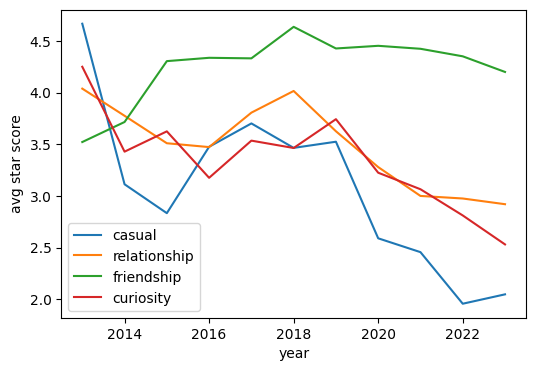

In [133]:
visualizer.plot_time_avg_score_category(annotated_tinder, queries=["casual sex", "relationship", "friendship", "curiosity"], figsize=(6,4))

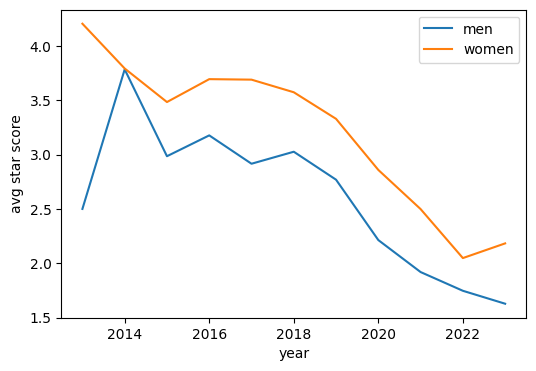

In [115]:
visualizer.plot_time_avg_score_category(annotated_tinder, queries=["men", "women"], figsize = (6,4))

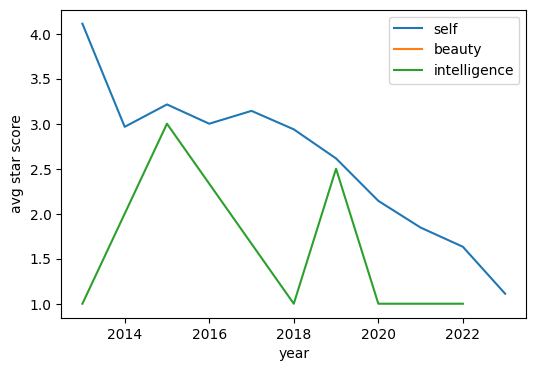

In [116]:
visualizer.plot_time_avg_score_category(annotated_tinder, queries=["self esteem", "beauty", "intelligence"], figsize = (6,4))

## __Lexicon__

In [104]:
def evaluate_lexicon(aspect, app, annotated_dataset):
    with open("data/lexicon_query_aspects.pickle", "rb+") as f:
        lexicon_query_aspects = pickle.load(f)

    aspects = lexicon_query_aspects[app][aspect]
    aspects_adjs = pd.read_pickle(f"data/aspects_adjs_{app}.pickle")

    aspects_combinations = []
    for aspect in aspects:
        for adj in np.unique(aspects_adjs[aspect]):
            if abs(sentiment_extraction.get_sentiwn_score(adj)) > 0.2:
                    aspects_combinations.append((aspect, adj))
    
    feature_vectors = []

    for _, review in annotated_dataset.iterrows():
        feature_vector = np.zeros(len(aspects))
        for i, aspect in enumerate(aspects):
            if aspect[0] in review["content"].lower() and aspect[1] in review["content"].lower():
                feature_vector[i] = 1
        feature_vectors.append(feature_vector)
    feature_vectors = np.array(feature_vectors)

    stars = [0 if score <=2 else 1 for score in annotated_dataset["score"].values]

    X_train, X_test, y_train, y_test = train_test_split(feature_vectors, stars, random_state=42)
    logit = Pipeline([('lg', LogisticRegression())])
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    return f1_score(y_test, y_pred)

In [105]:
for aspect in ["casual sex", "relationship", "frienship", "curiosity", "women", "men", "self esteem", "attractiveness", "intelligence"]:
    print(f"{aspect} F1 score: {evaluate_lexicon(aspect=aspect, app='tinder', annotated_dataset= annotated_tinder)}")

casual sex F1 score: 0.793343521820343
relationship F1 score: 0.7778427930563683
frienship F1 score: 0.794641343055791
curiosity F1 score: 0.794641343055791
women F1 score: 0.7769758210032479
men F1 score: 0.794641343055791
self esteem F1 score: 0.794641343055791
attractiveness F1 score: 0.7275862068965517
intelligence F1 score: 0.7774809160305343


# __Bumble__

In [126]:
annotated_bumble = general.bm25_annotate(queries, app="bumble")

In [128]:
annotated_bumble.groupby("category").reviewId.count()

category
attractiveness      17
casual             164
curiosity          619
friendship         586
intelligence         5
men                548
relationship       532
self               173
women             1082
Name: reviewId, dtype: int64

In [129]:
bumble_pos_percentage = annotated_bumble[annotated_bumble.score <= 2].groupby("category")["reviewId"].count()/annotated_bumble[annotated_bumble.score != 3].groupby("category")["reviewId"].count()*100
bumble_avg_polarity = annotated_tinder.groupby("category")["score"].mean()
bumble_pos_percentage

category
attractiveness     43.750000
casual             52.702703
curiosity          31.986532
friendship         21.311475
intelligence      100.000000
men                54.893617
relationship       39.049587
self               67.080745
women              34.375000
Name: reviewId, dtype: float64

## __Score Across Time__

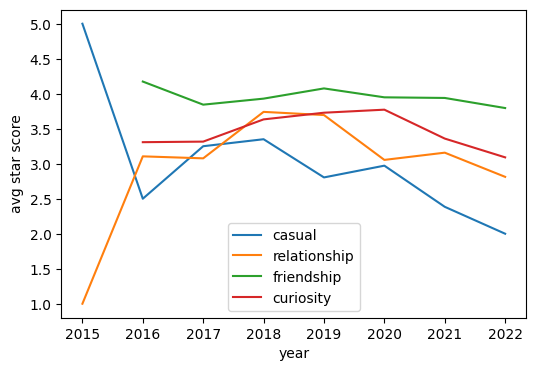

In [130]:
visualizer.plot_time_avg_score_category(annotated_bumble, queries=["casual sex", "relationship", "friendship", "curiosity"], figsize=(6,4))

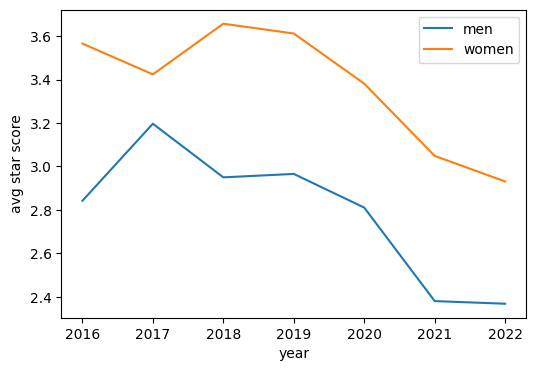

In [134]:
visualizer.plot_time_avg_score_category(annotated_bumble, queries=["men", "women"], figsize = (6,4))

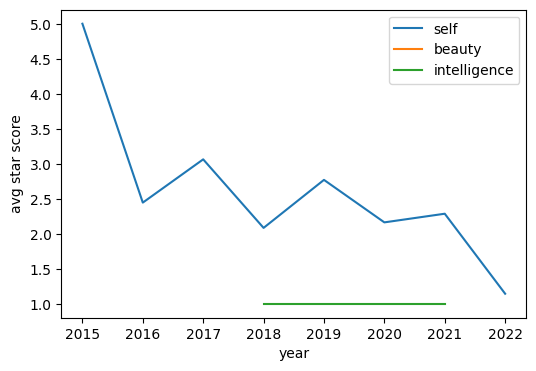

In [135]:
visualizer.plot_time_avg_score_category(annotated_bumble, queries=["self esteem", "beauty", "intelligence"], figsize = (6,4))

## __Lexicon__

In [137]:
for aspect in ["casual sex", "relationship", "friendship", "curiosity", "women", "men", "self esteem", "attractiveness", "intelligence"]:
    print(f"{aspect} F1 score: {evaluate_lexicon(aspect=aspect, app='bumble', annotated_dataset= annotated_bumble)}")

casual sex F1 score: 0.8002585649644472
relationship F1 score: 0.7896483078964831
friendship F1 score: 0.7992253066494512
curiosity F1 score: 0.8005148005148005
women F1 score: 0.7850964737192282
men F1 score: 0.8005148005148005
self esteem F1 score: 0.8005148005148005
attractiveness F1 score: 0.8005148005148005
intelligence F1 score: 0.7923533289386948


# __Hinge__

In [ ]:
annotated_hinge = general.bm25_annotate(queries, app="hinge")